# Project Title
### Data Engineering Capstone Project

#### Project Summary
--describe your project at a high level--

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [1]:
# Do all imports and installs here
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
import psycopg2
from sql_queries import *

### Step 1: Scope the Project and Gather Data

#### Scope 
Explain what you plan to do in the project in more detail. What data do you use? What is your end solution look like? What tools did you use? etc>

#### Describe and Gather Data 
Describe the data sets you're using. Where did it come from? What type of information is included? 

In [2]:
# Read in the data here
fname = '../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat'
df = pd.read_sas(fname, 'sas7bdat', encoding="ISO-8859-1")

In [3]:
df.shape

(3096313, 28)

In [4]:
df.head(10)[1:28]

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
1,7.0,2016.0,4.0,254.0,276.0,ATL,20551.0,1.0,AL,NaN,...,Y,NaN,1991.0,D/S,M,NaN,NaN,3.736796e+09,00296,F1
2,15.0,2016.0,4.0,101.0,101.0,WAS,20545.0,1.0,MI,20691.0,...,NaN,M,1961.0,09302016,M,NaN,OS,6.666432e+08,93,B2
3,16.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,NaN,M,1988.0,09302016,NaN,NaN,AA,9.246846e+10,00199,B2
4,17.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,NaN,M,2012.0,09302016,NaN,NaN,AA,9.246846e+10,00199,B2
5,18.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MI,20555.0,...,NaN,M,1959.0,09302016,NaN,NaN,AZ,9.247104e+10,00602,B1
6,19.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,NJ,20558.0,...,NaN,M,1953.0,09302016,NaN,NaN,AZ,9.247140e+10,00602,B2
7,20.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,NJ,20558.0,...,NaN,M,1959.0,09302016,NaN,NaN,AZ,9.247161e+10,00602,B2
8,21.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,NY,20553.0,...,NaN,M,1970.0,09302016,NaN,NaN,AZ,9.247080e+10,00602,B2
9,22.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,NY,20562.0,...,NaN,M,1968.0,09302016,NaN,NaN,AZ,9.247849e+10,00608,B1


In [5]:
df.columns

Index(['cicid', 'i94yr', 'i94mon', 'i94cit', 'i94res', 'i94port', 'arrdate',
       'i94mode', 'i94addr', 'depdate', 'i94bir', 'i94visa', 'count',
       'dtadfile', 'visapost', 'occup', 'entdepa', 'entdepd', 'entdepu',
       'matflag', 'biryear', 'dtaddto', 'gender', 'insnum', 'airline',
       'admnum', 'fltno', 'visatype'],
      dtype='object')

In [6]:
#write to parquet
# df.to_parquet('df_immigration.parquet.gzip',compression='gzip')

In [7]:
#write to parquet
# pd.read_parquet('df_immigration.parquet.gzip')

In [8]:
# spark.read.parquet("sas_data")
# df_spark=spark.read.parquet("sas_data")
# # parquetFile = spark.read.parquet("people.parquet")

In [9]:
import os
os.getcwd()

'/home/workspace'

In [10]:
# df_p = pd.read_parquet("/home/workspace/sas_data")

### World Temperature Data

In [11]:
fname = './../../data2/GlobalLandTemperaturesByCity.csv'
df_temp = pd.read_csv(fname)

In [12]:
df_temp.shape

(8599212, 7)

In [13]:
df_temp.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [14]:
df_temp.iloc[0:5,0:8]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [15]:
set(df_temp['Country'].values)
df_temp.groupby('Country')

grouped_df = df_temp.groupby('Country')    
gb = grouped_df.groups
 

In [16]:
df_temp['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States', 'India',
       'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela', 'Ghana',
       'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [17]:
df_temp_usa = df_temp[df_temp["Country"] == "United States"]
df_temp_usa.shape

(687289, 7)

In [18]:
df_temp_usa.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


## USA Demographics Data

In [19]:
# read the data ; note the delimiter is ";"
df_usa_demographics = pd.read_csv("./us-cities-demographics.csv", delimiter=";")

In [20]:
df_usa_demographics.shape

(2891, 12)

In [21]:
df_usa_demographics.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


In [22]:
df_usa_demographics.columns


Index(['City', 'State', 'Median Age', 'Male Population', 'Female Population',
       'Total Population', 'Number of Veterans', 'Foreign-born',
       'Average Household Size', 'State Code', 'Race', 'Count'],
      dtype='object')

## Airport Code Table

This is a table of airport codes and corresponding cities.


In [23]:
df_usa_airport_codes = pd.read_csv("./airport-codes_csv.csv")

In [24]:
df_usa_airport_codes.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [25]:
df_usa_airport_codes.columns

Index(['ident', 'type', 'name', 'elevation_ft', 'continent', 'iso_country',
       'iso_region', 'municipality', 'gps_code', 'iata_code', 'local_code',
       'coordinates'],
      dtype='object')

In [26]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.\
config("spark.jars.repositories", "https://repos.spark-packages.org/").\
config("spark.jars.packages", "saurfang:spark-sas7bdat:2.0.0-s_2.11").\
enableHiveSupport().getOrCreate()

df_spark = spark.read.format('com.github.saurfang.sas.spark').load('../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat')


In [27]:
df_spark.head

<bound method DataFrame.head of DataFrame[cicid: double, i94yr: double, i94mon: double, i94cit: double, i94res: double, i94port: string, arrdate: double, i94mode: double, i94addr: string, depdate: double, i94bir: double, i94visa: double, count: double, dtadfile: string, visapost: string, occup: string, entdepa: string, entdepd: string, entdepu: string, matflag: string, biryear: double, dtaddto: string, gender: string, insnum: string, airline: string, admnum: double, fltno: string, visatype: string]>

### Step 2: Explore/Assess the Data
#### Explore the Data 
* Document data quality issues (if any)
    * Are there any NA values?
    * Are there any duplicates? 
    * Any other issues
 

#### Clean the data
* Document data cleaning steps

In [28]:
df.shape

(3096313, 28)

In [29]:
# Performing cleaning tasks here
df.describe()

,cicid,i94yr,i94mon,i94cit,i94res,arrdate,i94mode,depdate,i94bir,i94visa,count,biryear,admnum
count,3.096313e+06,3096313.0,3096313.0,3.096313e+06,3.096313e+06,3.096313e+06,3.096074e+06,2.953856e+06,3.095511e+06,3.096313e+06,3096313.0,3.095511e+06,3.096313e+06
mean,3.078652e+06,2016.0,4.0,3.049069e+02,3.032838e+02,2.055985e+04,1.073690e+00,2.057395e+04,4.176761e+01,1.845393e+00,1.0,1.974232e+03,7.082885e+10
std,1.763278e+06,0.0,0.0,2.100269e+02,2.085832e+02,8.777339e+00,5.158963e-01,2.935697e+01,1.742026e+01,3.983910e-01,0.0,1.742026e+01,2.215442e+10
min,6.000000e+00,2016.0,4.0,1.010000e+02,1.010000e+02,2.054500e+04,1.000000e+00,1.517600e+04,-3.000000e+00,1.000000e+00,1.0,1.902000e+03,0.000000e+00
25%,1.577790e+06,2016.0,4.0,1.350000e+02,1.310000e+02,2.055200e+04,1.000000e+00,2.056100e+04,3.000000e+01,2.000000e+00,1.0,1.962000e+03,5.603523e+10
50%,3.103507e+06,2016.0,4.0,2.130000e+02,2.130000e+02,2.056000e+04,1.000000e+00,2.057000e+04,4.100000e+01,2.000000e+00,1.0,1.975000e+03,5.936094e+10
75%,4.654341e+06,2016.0,4.0,5.120000e+02,5.040000e+02,2.056700e+04,1.000000e+00,2.057900e+04,5.400000e+01,2.000000e+00,1.0,1.986000e+03,9.350987e+10
max,6.102785e+06,2016.0,4.0,9.990000e+02,7.600000e+02,2.057400e+04,9.000000e+00,4.542700e+04,1.140000e+02,3.000000e+00,1.0,2.019000e+03,9.991557e+10


In [30]:
df.iloc[0:4, 0:12]

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,i94bir,i94visa
0,6.0,2016.0,4.0,692.0,692.0,XXX,20573.0,NaN,NaN,NaN,37.0,2.0
1,7.0,2016.0,4.0,254.0,276.0,ATL,20551.0,1.0,AL,NaN,25.0,3.0
2,15.0,2016.0,4.0,101.0,101.0,WAS,20545.0,1.0,MI,20691.0,55.0,2.0
3,16.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,28.0,2.0


In [31]:
df.iloc[0:4, 12:22]

,count,dtadfile,visapost,occup,entdepa,entdepd,entdepu,matflag,biryear,dtaddto
0,1.0,NaN,NaN,NaN,T,NaN,U,NaN,1979.0,10282016
1,1.0,20130811,SEO,NaN,G,NaN,Y,NaN,1991.0,D/S
2,1.0,20160401,NaN,NaN,T,O,NaN,M,1961.0,09302016
3,1.0,20160401,NaN,NaN,O,O,NaN,M,1988.0,09302016


In [32]:
df.iloc[0:4, 22:]

,gender,insnum,airline,admnum,fltno,visatype
0,NaN,NaN,NaN,1.897628e+09,NaN,B2
1,M,NaN,NaN,3.736796e+09,00296,F1
2,M,NaN,OS,6.666432e+08,93,B2
3,NaN,NaN,AA,9.246846e+10,00199,B2


In [33]:
temp1 = ((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

In [34]:
temp1

entdepu     99.987340
occup       99.737559
insnum      96.327632
visapost    60.757746
gender      13.379429
i94addr      4.921079
depdate      4.600859
matflag      4.470769
entdepd      4.470769
airline      2.700857
fltno        0.631364
i94bir       0.025902
biryear      0.025902
dtaddto      0.015405
i94mode      0.007719
entdepa      0.007687
dtadfile     0.000032
i94cit       0.000000
i94mon       0.000000
i94port      0.000000
i94yr        0.000000
i94res       0.000000
visatype     0.000000
arrdate      0.000000
i94visa      0.000000
count        0.000000
admnum       0.000000
cicid        0.000000
dtype: float64

In [35]:
# Get port locations from SAS text file
with open("./I94_SAS_Labels_Descriptions.SAS") as f:
    lines = f.readlines()
    
liness =  [l.strip() for l in lines]
lines[0:3]


I94ports = liness[302:962]
I94ports[0:3]

I94ports_df = pd.DataFrame(data=I94ports, columns=['I94ports'])
I94ports_df.head()

,I94ports
0,"'ALC'\t=\t'ALCAN, AK '"
1,"'ANC'\t=\t'ANCHORAGE, AK '"
2,"'BAR'\t=\t'BAKER AAF - BAKER ISLAND, AK'"
3,"'DAC'\t=\t'DALTONS CACHE, AK '"
4,"'PIZ'\t=\t'DEW STATION PT LAY DEW, AK'"


In [36]:
I94ports_df = I94ports_df.join(I94ports_df['I94ports'].str.split(',', expand=True))
# I94ports_df

In [37]:
I94ports_df.shape

(660, 4)

In [38]:
I94ports_df = I94ports_df.drop(I94ports_df.columns[3], axis=1)

In [39]:
I94ports_df.head()

,I94ports,0,1
0,"'ALC'\t=\t'ALCAN, AK '",'ALC'\t=\t'ALCAN,AK '
1,"'ANC'\t=\t'ANCHORAGE, AK '",'ANC'\t=\t'ANCHORAGE,AK '
2,"'BAR'\t=\t'BAKER AAF - BAKER ISLAND, AK'",'BAR'\t=\t'BAKER AAF - BAKER ISLAND,AK'
3,"'DAC'\t=\t'DALTONS CACHE, AK '",'DAC'\t=\t'DALTONS CACHE,AK '
4,"'PIZ'\t=\t'DEW STATION PT LAY DEW, AK'",'PIZ'\t=\t'DEW STATION PT LAY DEW,AK'


In [40]:
I94ports_df.drop(columns=['I94ports'], axis=1, inplace=True)
I94ports_df.head()

,0,1
0,'ALC'\t=\t'ALCAN,AK '
1,'ANC'\t=\t'ANCHORAGE,AK '
2,'BAR'\t=\t'BAKER AAF - BAKER ISLAND,AK'
3,'DAC'\t=\t'DALTONS CACHE,AK '
4,'PIZ'\t=\t'DEW STATION PT LAY DEW,AK'


In [41]:
I94ports_df.rename(columns={ I94ports_df.columns[0]: "I94port_cities", 
                           I94ports_df.columns[1]: "I94port_state"}, inplace=True)

In [42]:
I94ports_df.head(5)

,I94port_cities,I94port_state
0,'ALC'\t=\t'ALCAN,AK '
1,'ANC'\t=\t'ANCHORAGE,AK '
2,'BAR'\t=\t'BAKER AAF - BAKER ISLAND,AK'
3,'DAC'\t=\t'DALTONS CACHE,AK '
4,'PIZ'\t=\t'DEW STATION PT LAY DEW,AK'


In [43]:
I94ports_df['I94port_state'] = I94ports_df['I94port_state'].str.replace('\'','')

In [44]:
I94ports_df.columns

Index(['I94port_cities', 'I94port_state'], dtype='object')

In [45]:
# I94ports_df['I94port_code_city'] = 
I94ports_df = I94ports_df.join(I94ports_df['I94port_cities'].str.split('\t', expand=True))
I94ports_df = I94ports_df.drop(I94ports_df.columns[0], axis=1)
I94ports_df.head()


,I94port_state,0,1,2,3
0,AK,'ALC',=,'ALCAN,None
1,AK,'ANC',=,'ANCHORAGE,None
2,AK,'BAR',=,'BAKER AAF - BAKER ISLAND,None
3,AK,'DAC',=,'DALTONS CACHE,None
4,AK,'PIZ',=,'DEW STATION PT LAY DEW,None


In [46]:
I94ports_df = I94ports_df.drop(I94ports_df.columns[2], axis=1)

In [47]:
I94ports_df = I94ports_df.drop(I94ports_df.columns[3], axis=1)
I94ports_df.head()

,I94port_state,0,2
0,AK,'ALC','ALCAN
1,AK,'ANC','ANCHORAGE
2,AK,'BAR','BAKER AAF - BAKER ISLAND
3,AK,'DAC','DALTONS CACHE
4,AK,'PIZ','DEW STATION PT LAY DEW


In [48]:
I94ports_df.rename(columns={ I94ports_df.columns[1]: "I94port_code", 
                             I94ports_df.columns[2]: "I94port_city"}, inplace=True)

In [49]:
I94ports_df.head()

,I94port_state,I94port_code,I94port_city
0,AK,'ALC','ALCAN
1,AK,'ANC','ANCHORAGE
2,AK,'BAR','BAKER AAF - BAKER ISLAND
3,AK,'DAC','DALTONS CACHE
4,AK,'PIZ','DEW STATION PT LAY DEW


In [50]:
I94ports_df['I94port_code'] = I94ports_df['I94port_code'].str.replace('\'','')
I94ports_df['I94port_city'] = I94ports_df['I94port_city'].str.replace('\'','')
I94ports_df.head(5)

,I94port_state,I94port_code,I94port_city
0,AK,ALC,ALCAN
1,AK,ANC,ANCHORAGE
2,AK,BAR,BAKER AAF - BAKER ISLAND
3,AK,DAC,DALTONS CACHE
4,AK,PIZ,DEW STATION PT LAY DEW


In [51]:
I94ports_df['I94port_state']=I94ports_df['I94port_state'].str.replace(" ","")
I94ports_df['I94port_code']=I94ports_df['I94port_code'].str.replace(" ","")
I94ports_df['I94port_city']=I94ports_df['I94port_city'].str.replace(" ","")
I94ports_df.head(5)

,I94port_state,I94port_code,I94port_city
0,AK,ALC,ALCAN
1,AK,ANC,ANCHORAGE
2,AK,BAR,BAKERAAF-BAKERISLAND
3,AK,DAC,DALTONSCACHE
4,AK,PIZ,DEWSTATIONPTLAYDEW


In [52]:
I94ports_df.head(3)

,I94port_state,I94port_code,I94port_city
0,AK,ALC,ALCAN
1,AK,ANC,ANCHORAGE
2,AK,BAR,BAKERAAF-BAKERISLAND


Let us identify all the "No Port data" from the `I94ports_df` and remove them from I94 data 

In [53]:
NoPort_code1 = I94ports_df[I94ports_df['I94port_city'].str.contains("NoPORT", regex=False)].I94port_code
NoPort_code2 = I94ports_df[I94ports_df['I94port_city'].str.contains("Collapsed", regex=False)].I94port_code

In [54]:
print("Number of NoPort codes1:", len(NoPort_code1))
print("Number of NoPort codes2:", len(NoPort_code2))
NoPort_code1.head()
type(NoPort_code1)

Number of NoPort codes1: 59
Number of NoPort codes2: 12


pandas.core.series.Series

In [55]:
NoPort_code2.head()
NoPort_code = NoPort_code2.append(NoPort_code1)
len(NoPort_code)

71

Let us remove all NoPort entries from the `df` dataset

In [56]:
NoPort_code.head(5)

198    GTF
199    INL
591    FRG
592    HRL
593    ISP
Name: I94port_code, dtype: object

In [57]:
# df_I94 = df['i94port'].isin(NoPort_code)
print("Let us print the dimension of df before cleaning")
print(df.shape)

df_i94 = df[~df['i94port'].isin(NoPort_code)]
print("Let us print the dimension of df after cleaning")
print(df_i94.shape)

# df['i94port'].head(5)
# NoPort_code[0:5]

Let us print the dimension of df before cleaning
(3096313, 28)
Let us print the dimension of df after cleaning
(3092098, 28)


In [58]:
# code from here, https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
# plt.figure(figsize=(10,6))
# sns.heatmap(df_i94.isna().transpose(),
#             cmap="YlGnBu",
#             cbar_kws={'label': 'Missing Data'})
# plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

Based on the missing values, let us drop the following columns: 

    * visapost
    * occup
    * entdepu
    * insnum
    

In [59]:
drop_cols = ["visapost", "occup", "entdepu","insnum"]
print("Let us print the dimension of df before cleaning")
print(df_i94.shape)

df_i94_clean = df_i94.drop(columns=drop_cols)
print("Let us print the dimension of df before cleaning")
print(df_i94_clean.shape)

Let us print the dimension of df before cleaning
(3092098, 28)
Let us print the dimension of df before cleaning
(3092098, 24)


In [60]:
print("Before dropping NA containing rows")
print("Shape of the `df_i94_clean", df_i94_clean.shape)

Before dropping NA containing rows
Shape of the `df_i94_clean (3092098, 24)


In [61]:
df_i94_clean.isna().sum()

cicid            0
i94yr            0
i94mon           0
i94cit           0
i94res           0
i94port          0
arrdate          0
i94mode        239
i94addr     151625
depdate     141950
i94bir         801
i94visa          0
count            0
dtadfile         1
entdepa        238
entdepd     137922
matflag     137922
biryear        801
dtaddto        477
gender      414257
airline      83627
admnum           0
fltno        19549
visatype         0
dtype: int64

In [62]:
# df_i94_clean.describe(include = 'all')

In [63]:
df_i94_clean.dropna(inplace=True)

In [64]:
print("After dropping NA containing rows")
print("Shape of the `df_i94_clean", df_i94_clean.shape)

After dropping NA containing rows
Shape of the `df_i94_clean (2381400, 24)


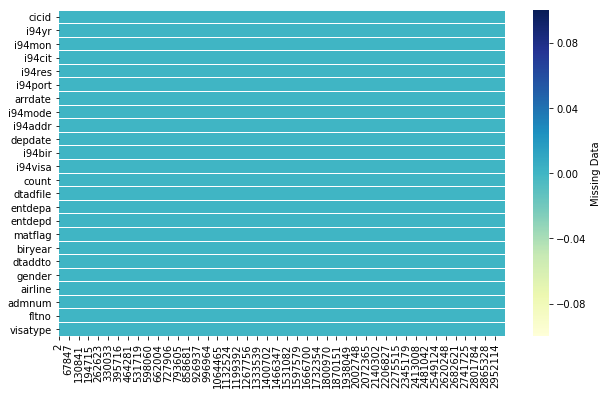

In [65]:
# check the heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df_i94_clean.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python1.png", dpi=100)

Check whether we have sucessfully removed NA values 

In [61]:
df_i94_clean.isna().sum()

cicid            0
i94yr            0
i94mon           0
i94cit           0
i94res           0
i94port          0
arrdate          0
i94mode        239
i94addr     151625
depdate     141950
i94bir         801
i94visa          0
count            0
dtadfile         1
entdepa        238
entdepd     137922
matflag     137922
biryear        801
dtaddto        477
gender      414257
airline      83627
admnum           0
fltno        19549
visatype         0
dtype: int64

Let us clean temperature dataframe

In [64]:
df_temp_usa.shape

(687289, 7)

In [65]:
df_temp_usa.isna().sum()

dt                                   0
AverageTemperature               25765
AverageTemperatureUncertainty    25765
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

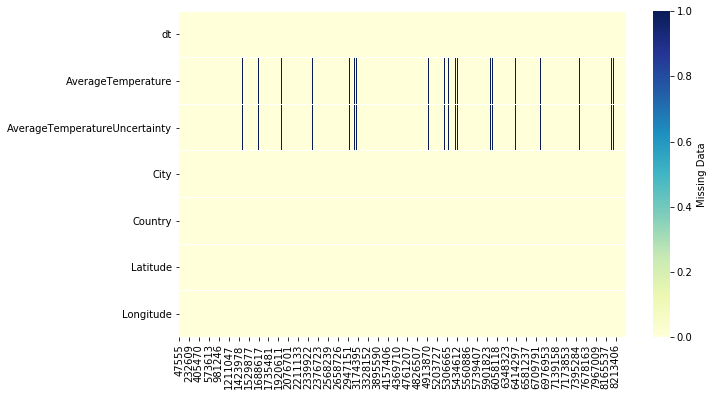

In [69]:
# check the heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df_temp_usa.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python2.png", dpi=100)

In [66]:
df_temp_usa.dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
print("After cleaning up NA values of `df_temp")

After cleaning up NA values of `df_temp


In [68]:
df_temp_usa.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [69]:
df_temp_usa = df_temp_usa.rename(columns={"dt":"timestamp",
                                          "AverageTemperature": "average_temperature",
                                          "AverageTemperatureUncertainty": "average_temperature_uncertainty",
                                          "City": "city",
                                          "Country": "country",
                                          "Latitude": "latitude",
                                          "Longitude": "longitude"
                                         })

In [70]:
df_temp_usa.columns

Index(['timestamp', 'average_temperature', 'average_temperature_uncertainty',
       'city', 'country', 'latitude', 'longitude'],
      dtype='object')

### Let us clean the Airport Codes data

In [71]:
df_usa_airport_codes.head(5)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


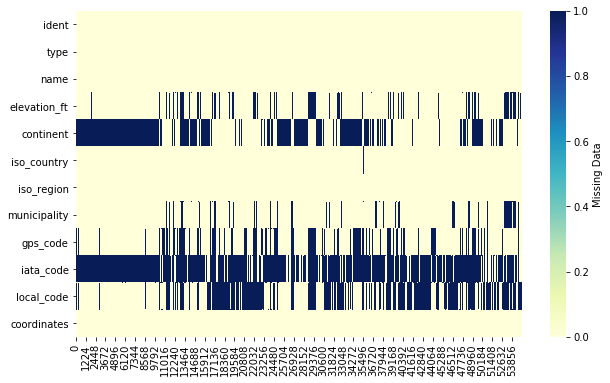

In [74]:
# check the heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df_usa_airport_codes.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python2.png", dpi=100)

Let us drop all the rows that have no `iata_code`

In [72]:
df_usa_airport_codes.dropna(subset = ['iata_code'], inplace=True)

In [73]:
df_usa_airport_codes.columns

Index(['ident', 'type', 'name', 'elevation_ft', 'continent', 'iso_country',
       'iso_region', 'municipality', 'gps_code', 'iata_code', 'local_code',
       'coordinates'],
      dtype='object')

In [74]:
print(df_usa_airport_codes.shape)

df_usa_airport_codes.iloc[0:4, 0:6]

(9189, 12)


,ident,type,name,elevation_ft,continent,iso_country
223,03N,small_airport,Utirik Airport,4.0,OC,MH
440,07FA,small_airport,Ocean Reef Club Airport,8.0,NaN,US
594,0AK,small_airport,Pilot Station Airport,305.0,NaN,US
673,0CO2,small_airport,Crested Butte Airpark,8980.0,NaN,US


In [75]:
df_usa_airport_codes.iloc[0:4, 6:13]

,iso_region,municipality,gps_code,iata_code,local_code,coordinates
223,MH-UTI,Utirik Island,K03N,UTK,03N,"169.852005, 11.222"
440,US-FL,Key Largo,07FA,OCA,07FA,"-80.274803161621, 25.325399398804"
594,US-AK,Pilot Station,NaN,PQS,0AK,"-162.899994, 61.934601"
673,US-CO,Crested Butte,0CO2,CSE,0CO2,"-106.928341, 38.851918"


In [76]:
df_usa_airport_codes['ident']

223       03N
440      07FA
594       0AK
673      0CO2
1088     0TE7
1402     13MA
1438      13Z
1555      16A
1574      16K
1722     19AK
1758      19P
1984      1KC
2170      1O6
2383      1Z1
2384      1Z9
2968      2AK
2972     2AK3
2975     2AK6
3143     2IG4
3195      2K5
3508     2TE0
3643      2Z1
3647      2Z6
4090     38WA
4152     3AK5
4329     3IS8
4671      3VS
4730      3Z8
5201      4A2
5204      4AK
         ... 
55039    ZWSS
55040    ZWTC
55041    ZWTN
55042    ZWTP
55043    ZWWW
55044    ZWYN
55045    ZYAS
55046    ZYCC
55047    ZYCH
55048    ZYCY
55049    ZYDU
55051    ZYFY
55052    ZYHB
55053    ZYHE
55054    ZYJL
55055    ZYJM
55056    ZYJS
55057    ZYJX
55058    ZYJZ
55059    ZYLD
55060    ZYLS
55061    ZYMD
55062    ZYMH
55063    ZYQQ
55064    ZYSQ
55066    ZYTL
55067    ZYTN
55068    ZYTX
55069    ZYYJ
55070    ZYYK
Name: ident, Length: 9189, dtype: object

### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chose that model

We used the following tables: 

* airports (DIMENSION): Contains information about the airports
* Demographics (DIMENSION): Contains demographics for cities
* Immigration (FACT): Contains I94 data 
* Temperature (DIMENSION): Contains temperature information for cities

#### 3.2 Mapping Out Data Pipelines
List the steps necessary to pipeline the data into the chosen data model. Here are the steps: 
* Use `create_tables.py` to create tables
* Merge `city` to `airports` data 
* After creating tables, insert data

```
# After running create_tables.py, insert the data into the database
Open a terminal and run the following command: 
    python ./create_tables.py
```

In [77]:
conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
cur = conn.cursor()

In [78]:
df_usa_airport_codes.columns

Index(['ident', 'type', 'name', 'elevation_ft', 'continent', 'iso_country',
       'iso_region', 'municipality', 'gps_code', 'iata_code', 'local_code',
       'coordinates'],
      dtype='object')

In [79]:
df_usa_airport_codes_1 = df_usa_airport_codes.merge(I94ports_df, left_on="iata_code", right_on="I94port_code")
df_usa_airport_codes_1.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates,I94port_state,I94port_code,I94port_city
0,57A,seaplane_base,Tokeen Seaplane Base,NaN,NaN,US,US-AK,Tokeen,57A,TKI,57A,"-133.32699585, 55.9370994568",AK,TKI,TOKEEN
1,5Z9,seaplane_base,Lake Brooks Seaplane Base,36.0,NaN,US,US-AK,Katmai National Park,5Z9,BKF,5Z9,"-155.77699279785, 58.554798126221",None,BKF,NoPORTCode(BKF)
2,89NY,small_airport,Maxson Airfield,340.0,NaN,US,US-NY,Alexandria Bay,89NY,AXB,89NY,"-75.90034, 44.312002",NY,AXB,ALEXANDRIABAY
3,AGGF,small_airport,Fera/Maringe Airport,NaN,OC,SB,SB-IS,Fera Island,AGGF,FRE,NaN,"159.576996, -8.1075",CA,FRE,FRESNO
4,ANZ,small_airport,Angus Downs Airport,1724.0,OC,AU,AU-NT,Angus Downs Station,NaN,ANZ,NaN,"132.2748, -25.0325",TX,ANZ,ANZALDUAS


In [80]:
df_usa_airport_codes_1.drop(columns=["I94port_code"], inplace=True)

In [81]:
df_usa_airport_codes_1.shape

(557, 14)

Let us retain only 

In [82]:
df_usa_airport_codes_2 = df_usa_airport_codes_1[["iata_code", "type", "name",  "elevation_ft", "continent", 
                 "iso_country", "iso_region", "municipality", "gps_code", "local_code", "coordinates", "I94port_city"]]

In [83]:
for index, row in df_usa_airport_codes_2.iterrows():
    cur.execute(airpt_ins, list(row.values))
    conn.commit()

#### Change the column names of `df_usa_demographics` dataframe  
city, state, median_age, male_population,
    female_population, total_population, num_of_veterans, foreign_born,
    average_household_size, state_code, race, count

In [84]:
df_usa_demographics = df_usa_demographics.rename(columns={"City":"city",
                                   "State": "state",
                                   "Median Age": "median_age",
                                   "Male Population": "male_population",
                                   "Female Population": "female_population",
                                   "Total Population": "total_population",
                                   "Number of Veterans": "num_of_veterans",
                                   "Foreign-born": "foreign_born",
                                   "Average Household Size": "average_household_size",
                                   "State Code": "state_code",
                                   "Race": "race",
                                   "Count": "count"})

In [85]:
df_usa_demographics.head(5)

,city,state,median_age,male_population,female_population,total_population,num_of_veterans,foreign_born,average_household_size,state_code,race,count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


In [86]:
df_usa_demographics.columns

Index(['city', 'state', 'median_age', 'male_population', 'female_population',
       'total_population', 'num_of_veterans', 'foreign_born',
       'average_household_size', 'state_code', 'race', 'count'],
      dtype='object')

In [87]:
df_usa_demographics.shape

(2891, 12)

In [88]:
df_usa_demographics.dropna(inplace=True)

In [89]:
df_usa_demographics.shape

(2875, 12)

In [90]:
df_usa_demographics.describe(include='all')

,city,state,median_age,male_population,female_population,total_population,num_of_veterans,foreign_born,average_household_size,state_code,race,count
count,2875,2875,2875.000000,2.875000e+03,2.875000e+03,2.875000e+03,2875.000000,2.875000e+03,2875.000000,2875,2875,2.875000e+03
unique,559,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,5,NaN
top,Springfield,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,Hispanic or Latino,NaN
freq,15,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,676,588,NaN
mean,NaN,NaN,35.434678,9.744502e+04,1.018469e+05,1.992919e+05,9361.714435,4.069181e+04,2.742543,NaN,NaN,4.886379e+04
std,NaN,NaN,4.250501,2.167572e+05,2.320513e+05,4.487144e+05,13216.754474,1.558259e+05,0.433291,NaN,NaN,1.446315e+05
min,NaN,NaN,22.900000,2.928100e+04,2.734800e+04,6.321500e+04,416.000000,8.610000e+02,2.000000,NaN,NaN,9.800000e+01
25%,NaN,NaN,32.800000,3.931400e+04,4.122700e+04,8.043800e+04,3737.500000,9.224000e+03,2.430000,NaN,NaN,3.454000e+03
50%,NaN,NaN,35.300000,5.233600e+04,5.380900e+04,1.067820e+05,5397.000000,1.883000e+04,2.650000,NaN,NaN,1.378000e+04
75%,NaN,NaN,38.000000,8.668750e+04,8.958900e+04,1.753080e+05,9368.000000,3.400300e+04,2.950000,NaN,NaN,5.414650e+04


In [91]:
df_usa_demographics.isna().sum()

city                      0
state                     0
median_age                0
male_population           0
female_population         0
total_population          0
num_of_veterans           0
foreign_born              0
average_household_size    0
state_code                0
race                      0
count                     0
dtype: int64

In [92]:
for index, row in df_usa_demographics.iterrows():
    cur.execute(demographic_ins, list(row.values))
    conn.commit()

In [93]:
df_i94_clean.columns

Index(['cicid', 'i94yr', 'i94mon', 'i94cit', 'i94res', 'i94port', 'arrdate',
       'i94mode', 'i94addr', 'depdate', 'i94bir', 'i94visa', 'count',
       'dtadfile', 'entdepa', 'entdepd', 'matflag', 'biryear', 'dtaddto',
       'gender', 'airline', 'admnum', 'fltno', 'visatype'],
      dtype='object')

In [ ]:
# change it to 
cicid, year, month, cit, res, iata, \
    arrdate, mode, addr, depdate, bir, visa, count, dtadfile, \
    entdepa, entdepd, matflag, biryear, dtaddto, gender, airline, \
    admnum, fltno, visatype)

In [94]:
df_i94_clean = df_i94_clean.rename(columns={"i94yr": "year", "i94mon": "month", 
                                             "i94cit": "cit","i94res": "res",
                                             "i94port": "iata",  
                                             "i94mode": "mode",  
                                             "i94addr": "addr", 
                                             "i94bir": "bir",
                                             "i94visa": "visa"
                                            })

In [95]:
df_i94_clean.columns

Index(['cicid', 'year', 'month', 'cit', 'res', 'iata', 'arrdate', 'mode',
       'addr', 'depdate', 'bir', 'visa', 'count', 'dtadfile', 'entdepa',
       'entdepd', 'matflag', 'biryear', 'dtaddto', 'gender', 'airline',
       'admnum', 'fltno', 'visatype'],
      dtype='object')

In [99]:
df_i94_clean.isna().sum()

cicid            0
year             0
month            0
cit              0
res              0
iata             0
arrdate          0
mode           239
addr        151625
depdate     141950
bir            801
visa             0
count            0
dtadfile         1
entdepa        238
entdepd     137922
matflag     137922
biryear        801
dtaddto        477
gender      414257
airline      83627
admnum           0
fltno        19549
visatype         0
dtype: int64

In [102]:
df_i94_clean.dropna(inplace=True)

In [103]:
df_i94_clean.isna().sum()

cicid       0
year        0
month       0
cit         0
res         0
iata        0
arrdate     0
mode        0
addr        0
depdate     0
bir         0
visa        0
count       0
dtadfile    0
entdepa     0
entdepd     0
matflag     0
biryear     0
dtaddto     0
gender      0
airline     0
admnum      0
fltno       0
visatype    0
dtype: int64

In [117]:
df_i94_clean.iloc[0:4, 0:17]

,cicid,year,month,cit,res,iata,arrdate,mode,addr,depdate,bir,visa,count,dtadfile,entdepa,entdepd,matflag
2,15.0,2016.0,4.0,101.0,101.0,WAS,20545.0,1.0,MI,20691.0,55.0,2.0,1.0,20160401,T,O,M
12,27.0,2016.0,4.0,101.0,101.0,BOS,20545.0,1.0,MA,20549.0,58.0,1.0,1.0,20160401,G,O,M
13,28.0,2016.0,4.0,101.0,101.0,ATL,20545.0,1.0,MA,20549.0,56.0,1.0,1.0,20160401,G,O,M
14,29.0,2016.0,4.0,101.0,101.0,ATL,20545.0,1.0,MA,20561.0,62.0,2.0,1.0,20160401,G,O,M


In [118]:
df_i94_clean.iloc[0:4, 17:25]

,biryear,dtaddto,gender,airline,admnum,fltno,visatype
2,1961.0,09302016,M,OS,6.666432e+08,93,B2
12,1958.0,04062016,M,LH,9.247876e+10,00422,B1
13,1960.0,04062016,F,LH,9.247890e+10,00422,B1
14,1954.0,09302016,M,AZ,9.250378e+10,00614,B2


In [127]:
df_i94_clean[~df_i94_clean.addr.str.isnumeric()]

,cicid,year,month,cit,res,iata,arrdate,mode,addr,depdate,...,entdepa,entdepd,matflag,biryear,dtaddto,gender,airline,admnum,fltno,visatype
2,15.0,2016.0,4.0,101.0,101.0,WAS,20545.0,1.0,MI,20691.0,...,T,O,M,1961.0,09302016,M,OS,6.666432e+08,93,B2
12,27.0,2016.0,4.0,101.0,101.0,BOS,20545.0,1.0,MA,20549.0,...,G,O,M,1958.0,04062016,M,LH,9.247876e+10,00422,B1
13,28.0,2016.0,4.0,101.0,101.0,ATL,20545.0,1.0,MA,20549.0,...,G,O,M,1960.0,04062016,F,LH,9.247890e+10,00422,B1
14,29.0,2016.0,4.0,101.0,101.0,ATL,20545.0,1.0,MA,20561.0,...,G,O,M,1954.0,09302016,M,AZ,9.250378e+10,00614,B2
15,30.0,2016.0,4.0,101.0,101.0,ATL,20545.0,1.0,NJ,20578.0,...,G,O,M,1967.0,09302016,M,OS,9.247021e+10,00089,B2
16,31.0,2016.0,4.0,101.0,101.0,ATL,20545.0,1.0,NY,20611.0,...,G,O,M,1973.0,09302016,M,OS,9.247129e+10,00089,B2
17,33.0,2016.0,4.0,101.0,101.0,HOU,20545.0,1.0,TX,20554.0,...,G,O,M,1963.0,09302016,F,TK,9.250930e+10,00033,B2
20,36.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,NJ,20561.0,...,G,O,M,1979.0,09302016,M,TK,9.250626e+10,00001,B2
21,37.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,NJ,20567.0,...,G,O,M,1967.0,09302016,F,AZ,9.247562e+10,00608,B2
22,38.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,NY,20575.0,...,G,O,M,1983.0,09302016,M,AZ,9.248609e+10,00608,B2


In [ ]:

df_i94_clean['addr'] addr 
addr = [x.replace('\t','') for x in addr]

In [114]:
for index, row in df_i94_clean.iterrows():
    cur.execute(immigration_ins, list(row.values))
    conn.commit()

ProgrammingError: syntax error at or near "\"
LINE 2: ...ES (15.0, 2016.0, 4.0, 101.0, 101.0, 'WAS', 20545.0, 1.0, \ 
                                                                     ^


### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model
Build the data pipelines to create the data model.

In [ ]:
# Write code here

#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the pipeline ran as expected. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness
 
Run Quality Checks

In [ ]:
# Perform quality checks here

#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project.
* Propose how often the data should be updated and why.
* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
 * The database needed to be accessed by 100+ people.